# Speleothem climate archive data

In [24]:
# Ref: https://www.kaggle.com/code/ruslankl/eeg-data-analysis
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu


init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [28]:
# oxygen = pd.read_txt('./data/1-7.csv', parse_dates=[0], infer_datetime_format=True)
oxygen = pd.read_csv('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/1-7.txt', sep="\t", header=None)

In [29]:
oxygen.head()

,0,1
0,2740.92,-0.90
1,2746.48,-1.06
2,2751.34,-1.28
3,2756.21,-1.16
4,2759.68,-1.06


In [30]:
oxygen.shape

(1345, 2)

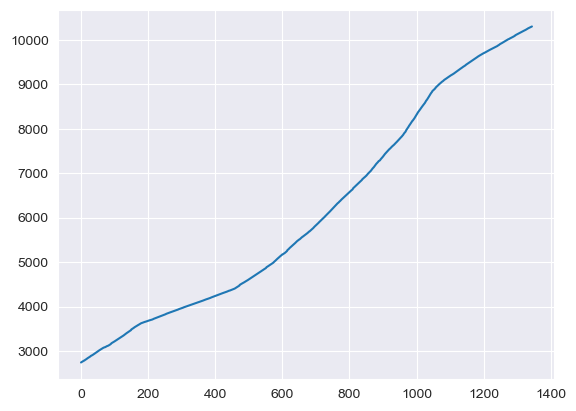

In [31]:
plt.plot(oxygen[0])

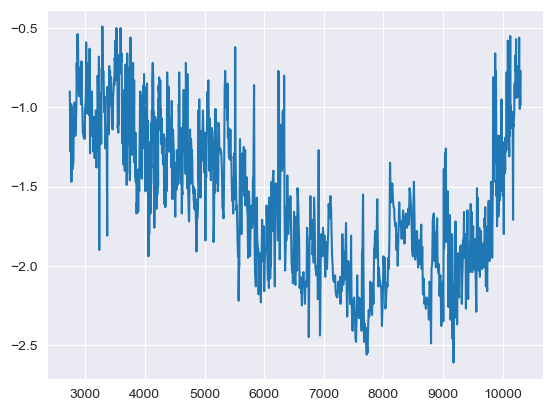

In [32]:
plt.plot(oxygen[0], oxygen[1]);

In [33]:
df_oxygen = oxygen.rename({0: 'Age Before Present', 1: 'Oxygen-18 (parts per thousands)'}, axis='columns')
df_oxygen

,Age Before Present,Oxygen-18 (parts per thousands)
0,2740.92,-0.90
1,2746.48,-1.06
2,2751.34,-1.28
3,2756.21,-1.16
4,2759.68,-1.06
...,...,...
1340,10284.99,-1.01
1341,10288.57,-0.93
1342,10293.16,-0.99
1343,10297.24,-0.97


In [34]:
fig = px.line(
    df_oxygen,
    x='Age Before Present',
    y=['Oxygen-18 (parts per thousands)'],
    # title='Title'
)
fig.show()

NameError: name 'px' is not defined

In [9]:
# plt.plot(df_oxygen[1])#

# Standard & Poor’s 500

In [35]:
sp500 = pd.read_csv('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/SP500.csv',parse_dates=[0], infer_datetime_format=True)

/var/folders/nn/3q6_mtc50k76l9qmq8wsp4780000gn/T/ipykernel_27815/3035888899.py:1: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [36]:
sp500.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [37]:
sp500.shape

(1768, 10)

In [13]:
sp500[['SP500']].plot(figsize=(20, 10))
plt.show()

NameError: name 'sp500' is not defined

In [14]:
import streamlit as st
from datetime import datetime, date, timedelta
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import numpy as np

ModuleNotFoundError: No module named 'streamlit'

In [38]:
START = "1900-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

st.title('S&P 500 Stock Price Prediction with Linear Regression')

st.markdown(
    "**Disclaimer:** This app is for informational purposes only and should not be used for making investment decisions. Always consult with a qualified financial advisor before making investment choices."
)

sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
sp500_symbols = sp500["Symbol"].tolist()

NameError: name 'date' is not defined

In [16]:
sp500.head()

NameError: name 'sp500' is not defined

In [39]:
stocks_input = st.text_input(
    'Enter S&P 500 stock symbols (comma-separated)', ''
)
selected_stocks = [
    symbol.strip().upper()
    for symbol in stocks_input.split(',')
    if symbol.strip() and symbol.strip().upper() in sp500_symbols
]

if not selected_stocks:
    st.warning('Please enter at least one valid S&P 500 stock symbol.')
else:
    min_date = st.date_input(
        'Select a start date', datetime.strptime(START, "%Y-%m-%d")
    )
    max_date = st.date_input(
        'Select an end date', datetime.strptime(TODAY, "%Y-%m-%d")
    )

    years_into_future = st.number_input('Years into the Future', min_value=1, max_value=10, step=1)

    data_load_state = st.text('Loading data...')

    for symbol in selected_stocks:
        data = yf.download(
            symbol,
            min_date.strftime("%Y-%m-%d"),
            max_date.strftime("%Y-%m-%d"),
        )

        st.write(f'{symbol} Historical Stock Prices:')
        st.write(data)

        # Linear regression to predict stock prices
        data['Date'] = np.arange(len(data))  # Use numerical index as X-axis
        X = data[['Date']].values
        y = data['Close'].values

        model = LinearRegression()
        model.fit(X, y)

        future_dates = [max_date + timedelta(days=i) for i in range(1, 365 * years_into_future)]
        future_dates_as_numbers = np.arange(len(data), len(data) + len(future_dates))

        future_prices = model.predict(future_dates_as_numbers.reshape(-1, 1))

        historical_performance_fig = go.Figure()
        historical_performance_fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name=f'{symbol} Historical Price'))
        historical_performance_fig.add_trace(go.Scatter(x=future_dates, y=future_prices, mode='lines', name=f'{symbol} Predicted Price'))

        historical_performance_fig.update_layout(
            title=f'Historical and Predicted Performance of {symbol}',
            xaxis_title='Date',
            yaxis_title='Stock Price',
            template='plotly_dark'
        )

        st.plotly_chart(historical_performance_fig)

    data_load_state.text('Loading data... done!')

NameError: name 'st' is not defined

# BabyECG

In [40]:
import pyreadr

result = pyreadr.read_r('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/BabyECG/BabyECG.rda') # also works for Rds, rda

# done! let's see what we got
# result is a dictionary where keys are the name of objects and the values python
# objects
print(result.keys()) # let's check what objects we got

odict_keys(['BabyECG'])


In [41]:
baby_ecg = result["BabyECG"] # extract the pandas data frame for object df1


In [42]:
baby_ecg.head()

,BabyECG
0,129.0
1,130.0
2,123.0
3,126.0
4,125.0


In [43]:
baby_ecg.columns

Index(['BabyECG'], dtype='object')

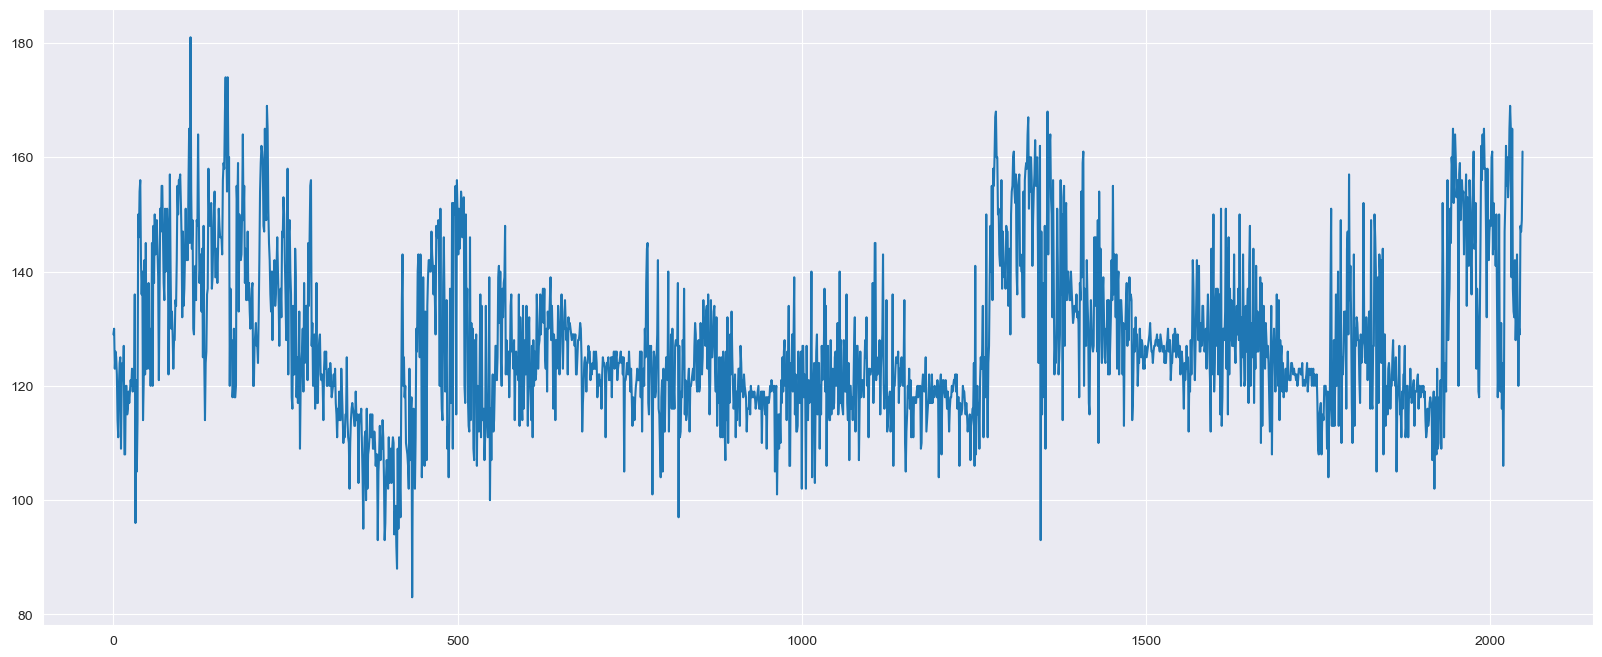

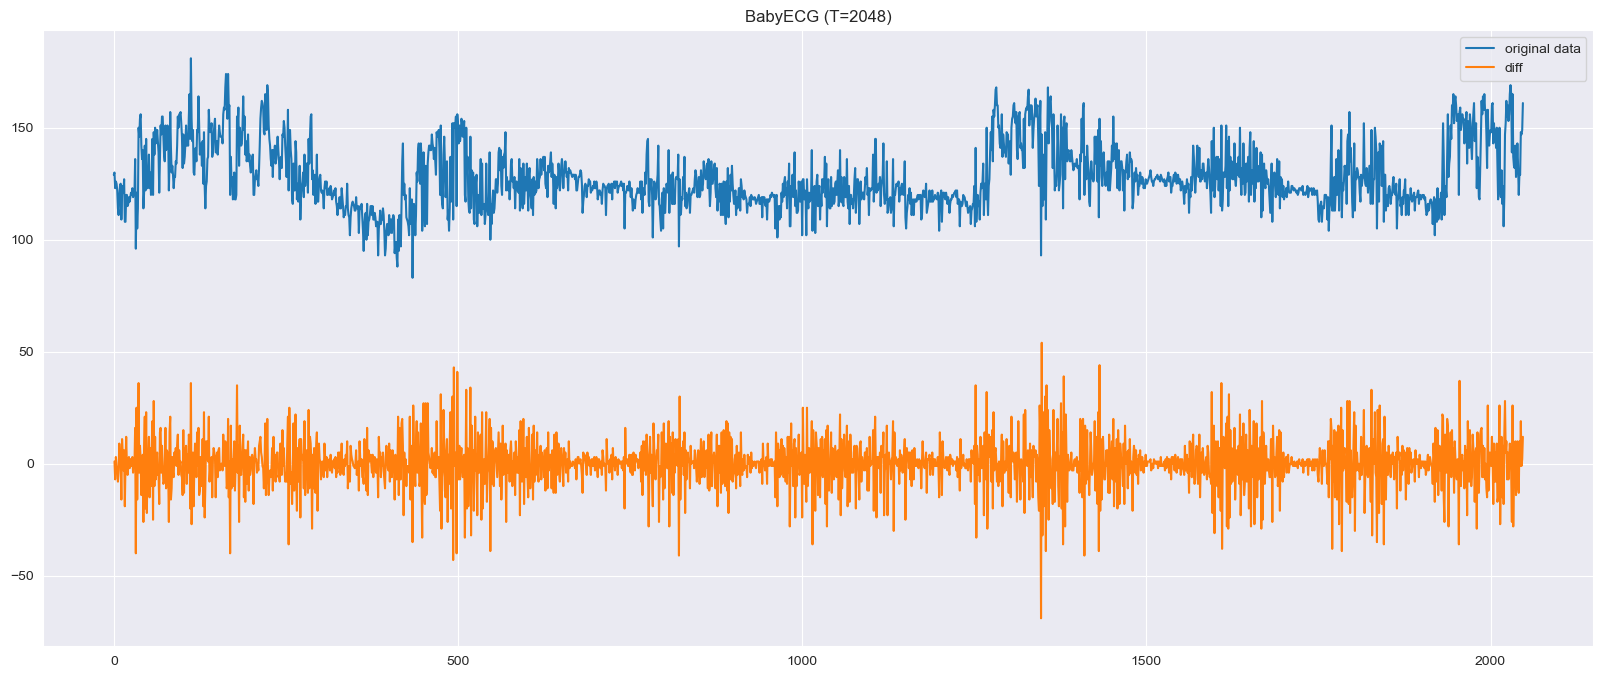

In [46]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(baby_ecg['BabyECG'])
# plt.plot(baby_ecg['BabyECG'].mean())
plt.show()

plt.rcParams["figure.figsize"] = (20,8)
plt.plot(baby_ecg['BabyECG'], label="original data")
plt.plot(baby_ecg['BabyECG'].diff(), label="diff")
# plt.plot(baby_ecg['BabyECG'].mean())
plt.legend()
plt.title("BabyECG (T=2048)")
plt.show()


In [45]:
baby_ecg['BabyECG'].shape

(2048,)

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(baby_ecg['BabyECG'].diff())
# plt.plot(baby_ecg['BabyECG'].mean())
plt.show()

In [19]:
result1 = pyreadr.read_r('./data/BabyECG/BabySS.rda') # also works for Rds, rda
print(result1)
baby_ss = result.values()

PyreadrError: File b'./data/BabyECG/BabySS.rda' does not exist!

In [20]:
print(baby_ss.values[1])

NameError: name 'baby_ss' is not defined

In [21]:
baby_ss['BabyECG']

NameError: name 'baby_ss' is not defined

In [22]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(baby_ss['BabyECG'])
# plt.plot(baby_ecg['BabyECG'].mean())
plt.show()

NameError: name 'plt' is not defined

# HRV

In [23]:
result2 = pyreadr.read_r('./data/HRV/HRVProcessedData.rda') # also works for Rds, rda
print(result2)
hrv = result2.values()

PyreadrError: File b'./data/HRV/HRVProcessedData.rda' does not exist!